In [ ]:
#Import the usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [ ]:
df = pd.read_csv('/content/sample_data/london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Dataset ini memiliki kolom data sebagai berikut:

- lsoa_code: area polisi tertentu
- brorough: daerah di london tempat kejadian terjadi
- major_category: kategori besar tindak kriminal
- minor_category: kategori kecil tindak kriminal
- value: jumlah kasus untuk tindak kriminal kategori tersebut di daerah tersebut di bulan dan tahun itu
- year: tahun
- month: bulan

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64


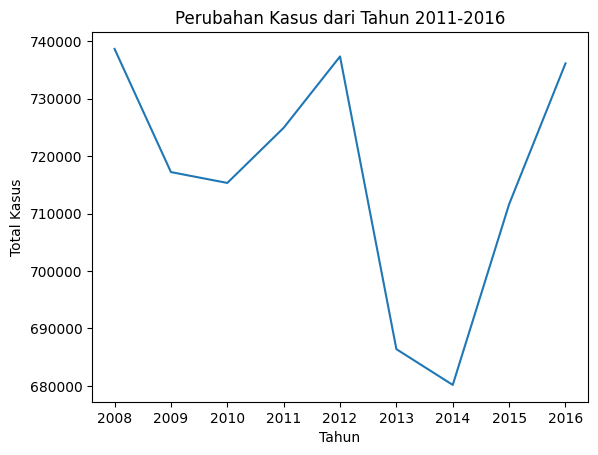

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menjumlahkan total kasus
yearly_crime = df.groupby('year')['value'].sum()

# Menampilkan perubahan kasus dari tahun 2011-2016
print(yearly_crime)

# Anda juga dapat memvisualisasikan data ini dengan grafik garis
yearly_crime.plot(kind='line', title='Perubahan Kasus dari Tahun 2011-2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')
plt.show()

Perubahan jumlah kasus dari 2011 ke 2016: 11206 kasus


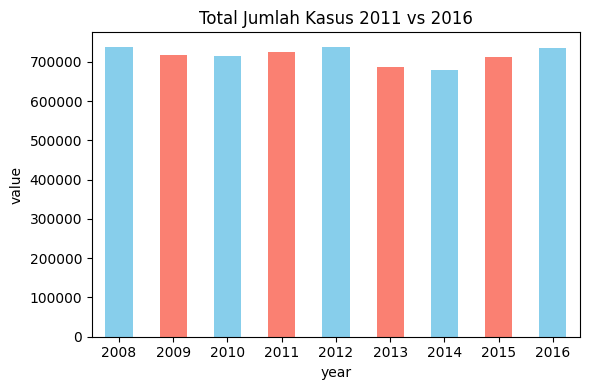


Tindak kriminal paling sering terjadi per daerah di 2016:
                    borough               major_category  value
8      Barking and Dagenham  Violence Against the Person   6067
16                   Barnet           Theft and Handling   9731
26                   Bexley  Violence Against the Person   4503
35                    Brent  Violence Against the Person   9205
43                  Bromley           Theft and Handling   7584
52                   Camden           Theft and Handling  14088
59           City of London           Theft and Handling    129
69                  Croydon  Violence Against the Person  10302
77                   Ealing           Theft and Handling  10040
86                  Enfield           Theft and Handling   8037
96                Greenwich  Violence Against the Person   8590
104                 Hackney           Theft and Handling  11851
113  Hammersmith and Fulham           Theft and Handling   8925
122                Haringey           Theft a

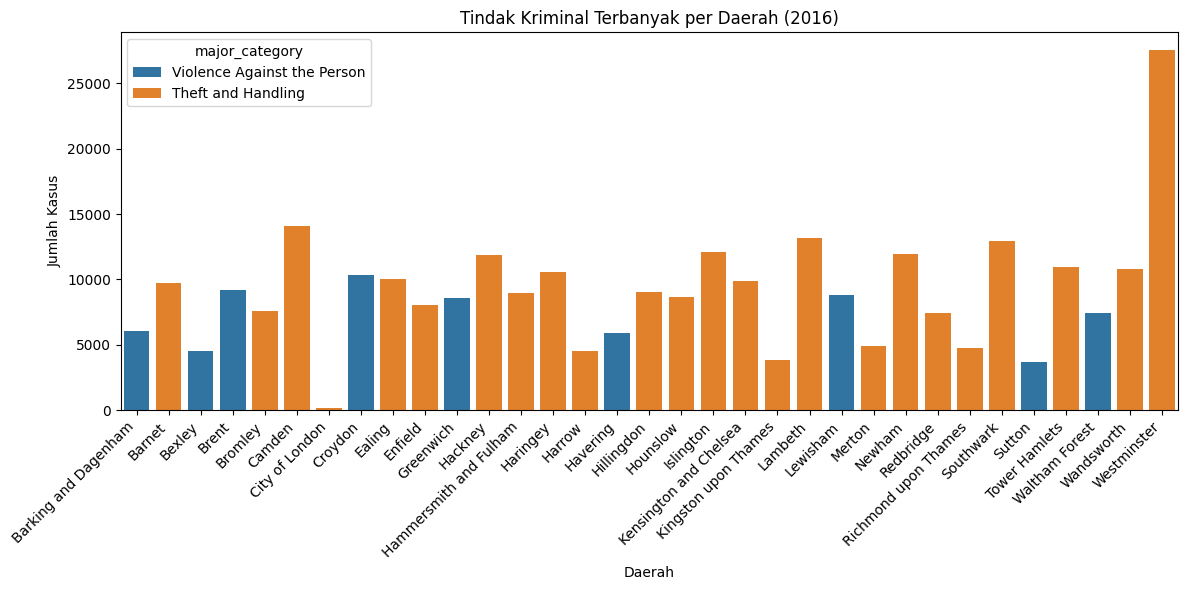

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data
df = pd.read_csv('/content/sample_data/london_crime_by_lsoa.csv')

# Pertanyaan 1: Perubahan jumlah kasus dari 2011 ke 2016
kasus_2011 = df[df['year'] == 2011]['value'].sum()
kasus_2016 = df[df['year'] == 2016]['value'].sum()
perubahan = kasus_2016 - kasus_2011

print(f"Perubahan jumlah kasus dari 2011 ke 2016: {perubahan} kasus")

# Visualisasi perubahan jumlah kasus
plt.figure(figsize=(6,4))
df.groupby('year')['value'].sum().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Jumlah Kasus 2011 vs 2016')
plt.ylabel('value')
plt.xlabel('year')
plt.xticks(rotation=0) # Untuk memastikan label tahun terlihat jelas
plt.tight_layout()
plt.show()

# Pertanyaan 2: Tindak kriminal paling sering terjadi per daerah di 2016
df_2016 = df[df['year'] == 2016]
# Pastikan kolom 'borough' digunakan untuk daerah
top_jenis_per_daerah = df_2016.groupby(['borough', 'major_category'])['value'].sum().reset_index()
top_jenis = top_jenis_per_daerah.loc[top_jenis_per_daerah.groupby('borough')['value'].idxmax()]

print("\nTindak kriminal paling sering terjadi per daerah di 2016:")
print(top_jenis[['borough', 'major_category', 'value']]) # Menampilkan borough, major_category, dan value

# Visualisasi
plt.figure(figsize=(12, 6))  # Memperbesar ukuran agar label terlihat
sns.barplot(data=top_jenis, x='borough', y='value', hue='major_category')
plt.title('Tindak Kriminal Terbanyak per Daerah (2016)')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Daerah')
plt.xticks(rotation=45, ha='right')  # Rotasi label daerah agar mudah dibaca
plt.tight_layout()
plt.show()

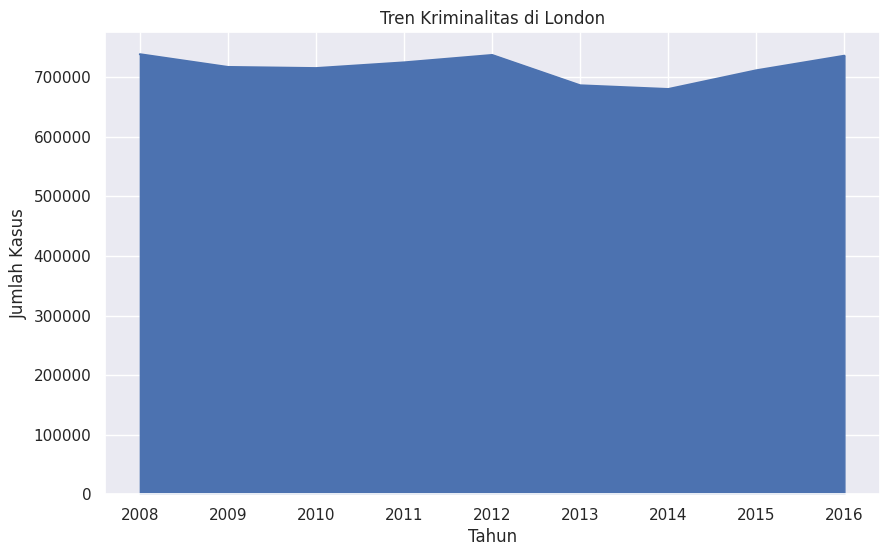

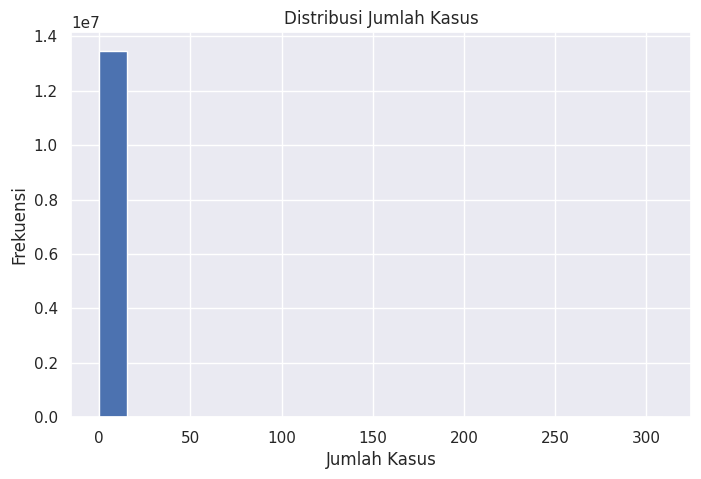

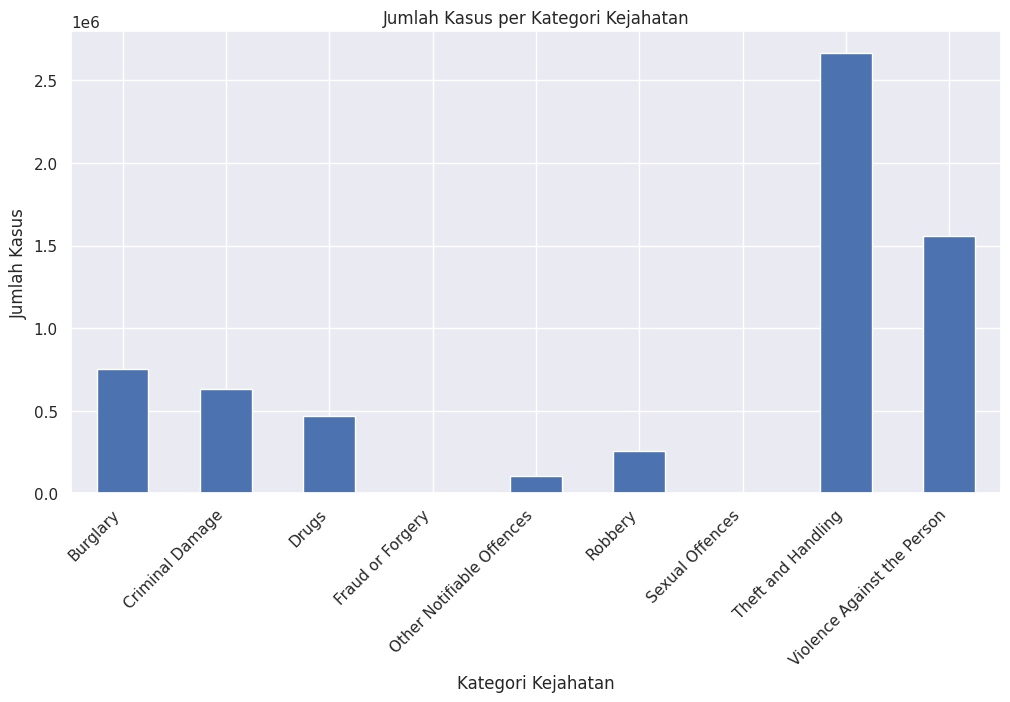

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn styling
sns.set_theme()

# Baca data
df = pd.read_csv('/content/sample_data/london_crime_by_lsoa.csv')

# 1. Area Plot
plt.figure(figsize=(10, 6)) # Set figure size
df.groupby('year')['value'].sum().plot(kind='area', title='Tren Kriminalitas di London')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')
plt.show()

# 2. Histogram
plt.figure(figsize=(8, 5)) # Set figure size
plt.hist(df['value'], bins=20)
plt.title('Distribusi Jumlah Kasus')
plt.xlabel('Jumlah Kasus')
plt.ylabel('Frekuensi')
plt.show()

# 3. Bar Chart
plt.figure(figsize=(12, 6)) # Set figure size
df.groupby('major_category')['value'].sum().plot(kind='bar', title='Jumlah Kasus per Kategori Kejahatan')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Kategori Kejahatan')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.show()

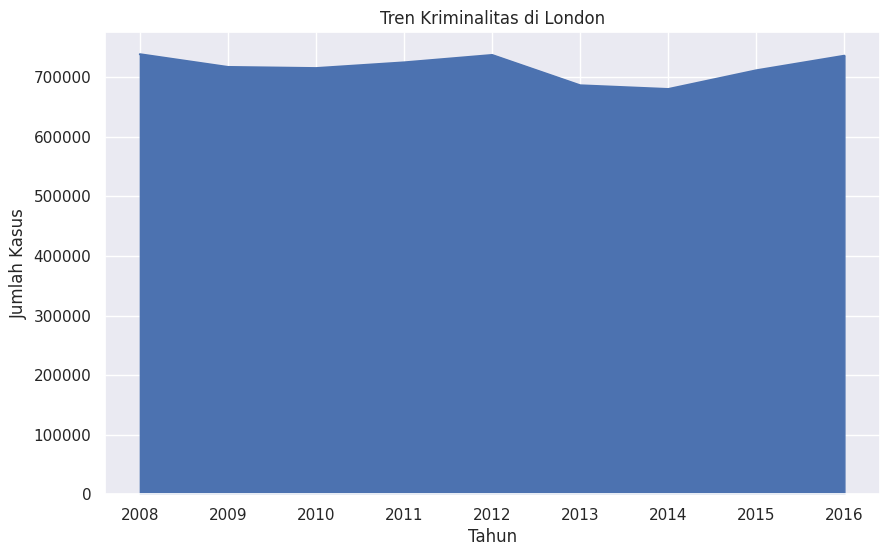

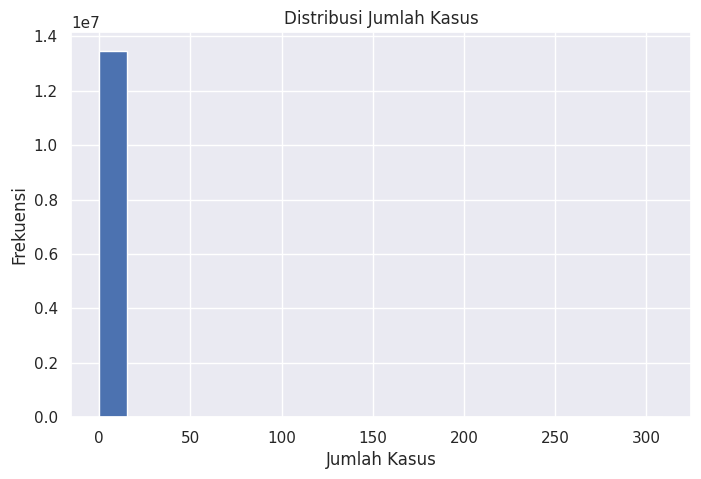

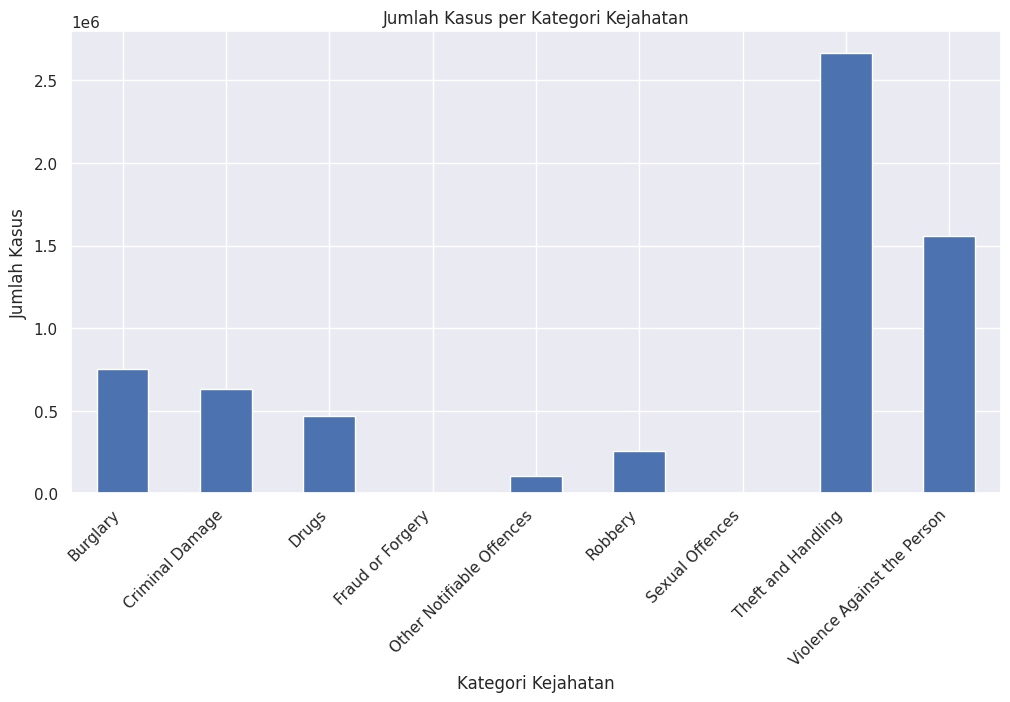

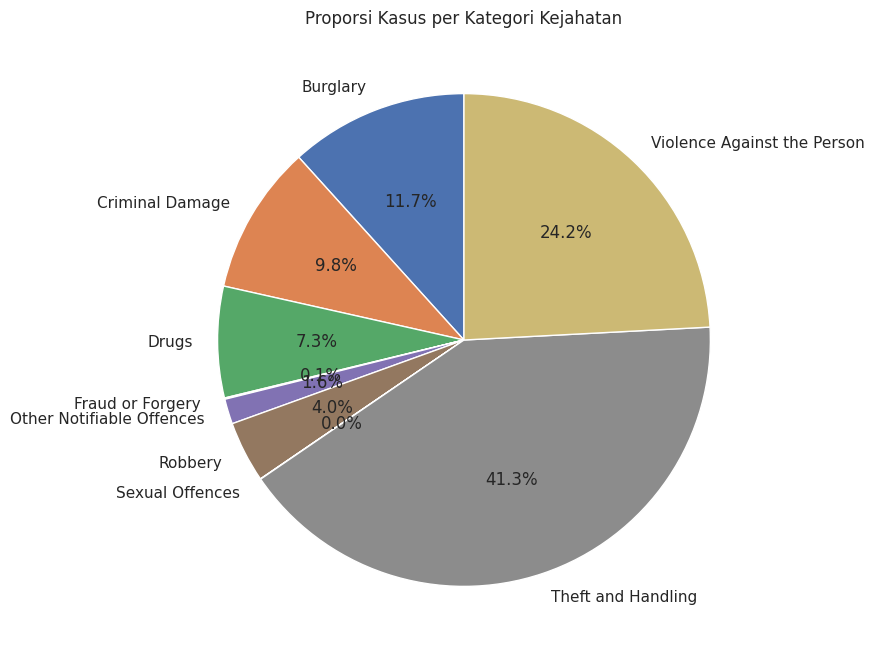

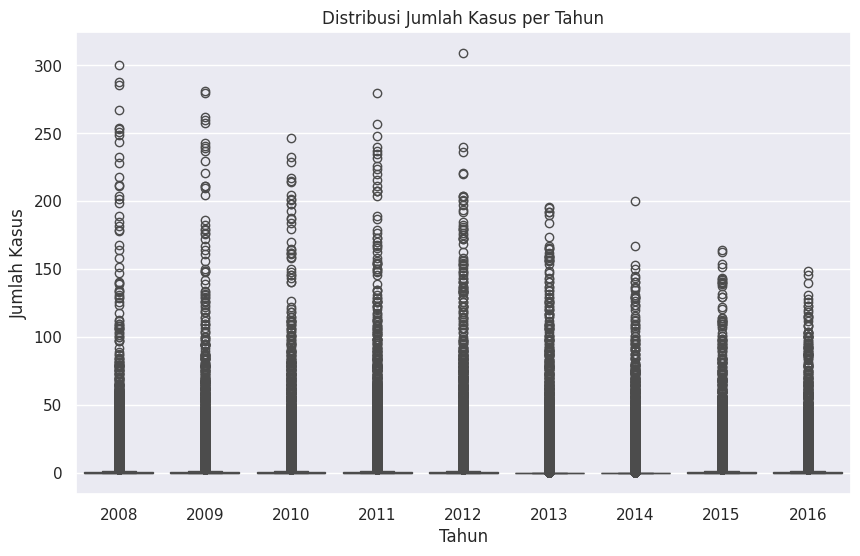

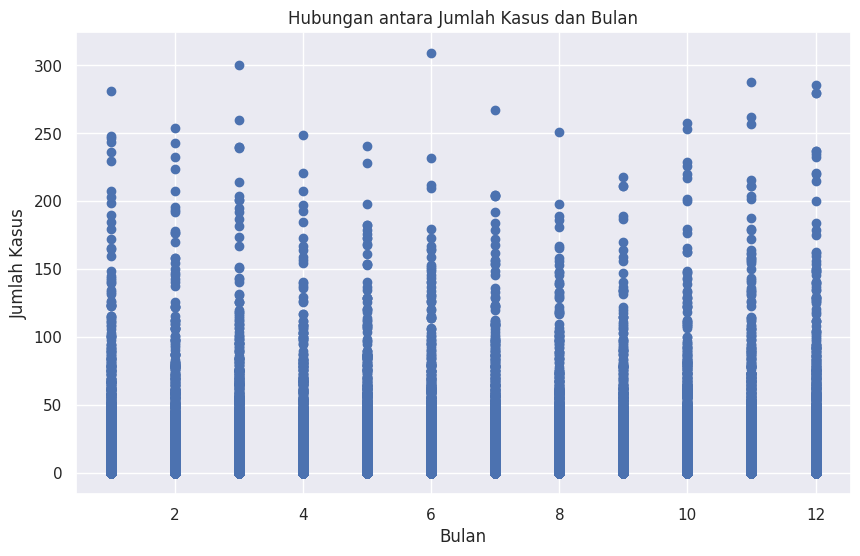

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn styling
sns.set_theme()

# Read data
df = pd.read_csv('/content/sample_data/london_crime_by_lsoa.csv')

# 1. Area Plot (Trend of crime over time)
plt.figure(figsize=(10, 6))
df.groupby('year')['value'].sum().plot(kind='area', title='Tren Kriminalitas di London')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')
plt.show()

# 2. Histogram (Distribution of crime counts)
plt.figure(figsize=(8, 5))
plt.hist(df['value'], bins=20)
plt.title('Distribusi Jumlah Kasus')
plt.xlabel('Jumlah Kasus')
plt.ylabel('Frekuensi')
plt.show()

# 3. Bar Chart (Total cases per crime category)
plt.figure(figsize=(12, 6))
df.groupby('major_category')['value'].sum().plot(kind='bar', title='Jumlah Kasus per Kategori Kejahatan')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Kategori Kejahatan')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Pie Chart (Proportion of cases per crime category)
crime_category_counts = df.groupby('major_category')['value'].sum()
plt.figure(figsize=(8, 8))
plt.pie(crime_category_counts, labels=crime_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kasus per Kategori Kejahatan')
plt.show()

# 5. Box Plot (Distribution of crime counts by year)
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='value', data=df)
plt.title('Distribusi Jumlah Kasus per Tahun')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')
plt.show()

# 6. Scatter Plot (Relationship between crime counts and month)
plt.figure(figsize=(10, 6))
plt.scatter(df['month'], df['value'])
plt.title('Hubungan antara Jumlah Kasus dan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus')
plt.show()

# Overall Analysis
# - Observe trends in crime rates over time using the area plot.
# - Identify the distribution of crime counts using the histogram.
# - Analyze the frequency of different crime categories using the bar chart and pie chart.
# - Explore the distribution of crime counts for each year using the box plot, identifying potential outliers.
# - Investigate the relationship between crime counts and month using the scatter plot.

# Further analysis can involve:
# - Exploring crime trends for specific boroughs.
# - Investigating the relationship between crime types and boroughs.
# - Identifying hotspots of crime using the LSOA codes.
# - Performing statistical analysis to test hypotheses about crime patterns.